In [2]:
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import display
pd.options.display.max_columns = None

from util.base import log,logaz,timit
# hacky check Pandas w/o relying on import
def not_pd_struct(obj):
  return obj.__class__.__name__ not in ('Series','DataFrame')
def lpd(obj): log('\n%s',obj)
from util.fp import mapl

In [3]:
# data: csv -> DF
@timit()
@logaz('zs')
def load_1(path):
  return (pd.read_csv(
    path, sep='\t',
    encoding='mac_roman', # why?,
#     usecols=[],
    thousands=',' # auto-parse thousand-separated number-strings
    ))
@timit()
@logaz('zs')
def load_n(paths):
  dfs = mapl(load_1, paths)
  return pd.concat(dfs, axis='index', ignore_index=True)

df = load_n(paths=['H-1B_FY%s.tsv'%yy for yy in range(15,18+1)]) # 2.6 mil row; 2 GB; 45 secs
log(df.columns)
log(len(df))
df.describe()

<base.log_a:40> load_1:  -> 618804
<base.time_a:58> __main__.load_1: 9.9 s
/Users/Davidius/praxis/pytudes/util/fp.py:6: DtypeWarning: Columns (14,15) have mixed types. Specify dtype option on import or set low_memory=False.
  mapl = lambda f,itr: list(map(f,itr)) # actuate map-generator -> mapped-list
<base.log_a:40> load_1:  -> 647852
<base.time_a:58> __main__.load_1: 10.2 s
/Users/Davidius/praxis/pytudes/util/fp.py:6: DtypeWarning: Columns (14,15,16,24) have mixed types. Specify dtype option on import or set low_memory=False.
  mapl = lambda f,itr: list(map(f,itr)) # actuate map-generator -> mapped-list
<base.log_a:40> load_1:  -> 624650
<base.time_a:58> __main__.load_1: 13.3 s
/Users/Davidius/praxis/pytudes/util/fp.py:6: DtypeWarning: Columns (15,16) have mixed types. Specify dtype option on import or set low_memory=False.
  mapl = lambda f,itr: list(map(f,itr)) # actuate map-generator -> mapped-list
<base.log_a:40> load_1:  -> 654360
<base.time_a:58> __main__.load_1: 13.9 s
/usr/lo

,AMENDED_PETITION,CHANGE_EMPLOYER,CHANGE_PREVIOUS_EMPLOYMENT,CONTINUED_EMPLOYMENT,NAIC_CODE,NEW_CONCURRENT_EMP,NEW_CONCURRENT_EMPLOYMENT,NEW_EMPLOYMENT,PREVAILING_WAGE,PUBLIC_DISCLOSURE_LOCATION,PW_SOURCE_YEAR,PW_WAGE_SOURCE_YEAR,TOTAL WORKERS,TOTAL_WORKERS,WAGE_RATE_OF_PAY_FROM,WAGE_RATE_OF_PAY_TO
count,1.279010e+06,1.279010e+06,1.279010e+06,1.279010e+06,1.266631e+06,654360.000000,624650.000000,1.279010e+06,2.545594e+06,0.0,1.926689e+06,618723.000000,618789.000000,1.926862e+06,1.926862e+06,1.926857e+06
mean,3.244799e-01,2.811753e-01,1.376432e-01,3.418535e-01,4.570926e+05,0.015667,0.008979,8.409794e-01,7.322340e+04,NaN,2.016180e+03,2014.219072,2.033575,1.968401e+00,8.445967e+04,2.456056e+04
std,1.538891e+00,1.320563e+00,1.067160e+00,1.549099e+00,1.891994e+05,0.276556,0.157690,3.809960e+00,6.402361e+05,NaN,6.143710e+00,4.442955,4.718419,5.306074e+00,7.216922e+05,5.386113e+04
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,NaN,0.000000e+00,0.000000,1.000000,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.161100e+05,0.000000,0.000000,0.000000e+00,5.690900e+04,NaN,2.015000e+03,2014.000000,1.000000,1.000000e+00,6.369000e+04,0.000000e+00
50%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.415110e+05,0.000000,0.000000,0.000000e+00,7.042900e+04,NaN,2.016000e+03,2014.000000,1.000000,1.000000e+00,7.820300e+04,0.000000e+00
75%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.415110e+05,0.000000,0.000000,1.000000e+00,8.914900e+04,NaN,2.017000e+03,2015.000000,1.000000,1.000000e+00,1.000000e+05,0.000000e+00
max,1.090000e+02,1.500000e+02,7.500000e+01,9.900000e+01,9.999990e+05,50.000000,50.000000,2.000000e+02,1.000000e+09,NaN,7.201000e+03,2016.000000,300.000000,2.000000e+02,1.000000e+09,9.103328e+06


In [13]:
# map columns
""" TODO k -> v & typ
  works for 2015-2018
  2014 has a more verbose variant i.e. 'LCA_...'
  """
key_map = {
  'CASE_STATUS':'status',
  'CASE_SUBMITTED':'submit',
  'DECISION_DATE':'date_dcsn',
  'EMPLOYMENT_START_DATE':'date_start',
  'EMPLOYMENT_END_DATE':'date_end',
  'EMPLOYER_NAME':'employer',
  'JOB_TITLE':'title',
  'PREVAILING_WAGE':'pay_ref',
  'WAGE_RATE_OF_PAY_FROM':'pay_from',
  'WAGE_RATE_OF_PAY_TO':'pay_to',
  'EMPLOYER_CITY':'city',
  'EMPLOYER_STATE':'state',
  'AGENT_ATTORNEY_NAME':'attorney',
  }
@timit()
def map_col_names(df):
  return (
    df
    .rename(columns=key_map)
  #   .astype({
  #     'pay_from':float,
  #     })
    [list(key_map.values())] # select subset
  )
df = map_col_names(df)
df.describe()

<base.time_a:56> __main__.map_col_names: 8.1 s


,pay_ref,pay_from,pay_to
count,2.545594e+06,1.926862e+06,1.926857e+06
mean,7.322340e+04,8.445967e+04,2.456056e+04
std,6.402361e+05,7.216922e+05,5.386113e+04
min,0.000000e+00,0.000000e+00,0.000000e+00
25%,5.690900e+04,6.369000e+04,0.000000e+00
50%,7.042900e+04,7.820300e+04,0.000000e+00
75%,8.914900e+04,1.000000e+05,0.000000e+00
max,1.000000e+09,1.000000e+09,9.103328e+06


In [1]:
# select subset
COLS_INDEX = ['date_start',]
COLS_ORDER = ['pay_from',]
@timit()
def pick(df, employer='citadel'):
  df = (
    df[df['employer']
    .str.lower()
    .str.contains(employer)
    .fillna(False)]
    .sort_values(by=COLS_ORDER)
    .reset_index()
    )
  lpd(df.describe())
  return df

df_test = pick(df,'citadel')

NameError: name 'timit' is not defined

In [115]:
@timit()
@logaz('zs')
def exclude_outliers(df, cols=COLS_ORDER, n_std=3):
  df = df.dropna(subset=['pay_from']).reindex()
  df['z_score'] = (df[cols] - df[cols].mean()) / df[cols].std()
  df = df[df['z_score'].abs() <= 3].reset_index()
  lpd(df.describe())
  return df

df_test_fltr = exclude_outliers(df_test)

<<ipython-input-107-e52ba5bfd48c>.lpd:10> 
          level_0         index        pay_ref       pay_from         pay_to  \
count  784.000000  7.840000e+02     784.000000     784.000000     784.000000   
mean   391.500000  1.554898e+06   79081.670918  130715.211735   22257.653061   
std    226.465597  5.590228e+05   26636.518098   48367.075587   61651.949720   
min      0.000000  6.261710e+05    1036.000000    2300.000000       0.000000   
25%    195.750000  1.080062e+06   58053.000000   80000.000000       0.000000   
50%    391.500000  1.396836e+06   72321.500000  145000.000000       0.000000   
75%    587.250000  2.072403e+06   92768.000000  165000.000000       0.000000   
max    783.000000  2.541542e+06  237494.000000  250000.000000  300000.000000   

          z_score  
count  784.000000  
mean    -0.026288  
std      0.922505  
min     -2.475551  
25%     -0.993579  
50%      0.246166  
75%      0.627626  
max      2.248831  
<base.log_a:38> exclude_outliers:  -> 784
<base.time_a:5

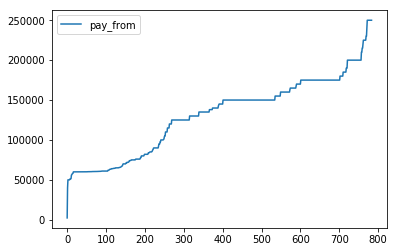

<base.time_a:56> __main__.plot_spread: 0.3 s


In [128]:
@timit()
def plot_spread(df):
  (
    df[['pay_from','z_score']]
    .sort_values('pay_from')
    .reset_index()
#     .reindex(df['z_score'])
    .plot(
      kind='line',
#       x='z_score',
      y='pay_from',
      )
    )
  plt.show()

plot_spread(df_test_fltr)

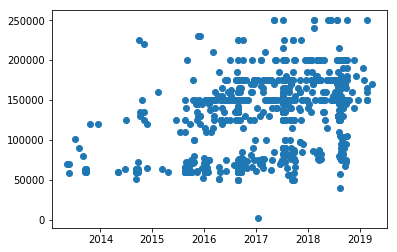

<base.time_a:56> __main__.plot_trend: 0.3 s


In [129]:
@timit()
def plot_trend(df):
#   (
#     df[['pay_from','date_start']]
#     .plot_date(
#       kind='scatter',
#       x='date_start',
#       y='pay_from',
#       )
#     )
  plt.plot_date(x=pd.to_datetime(df['date_start']), y=df['pay_from'])
  plt.show()

plot_trend(df_test_fltr)